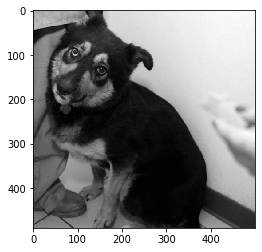

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import os
import cv2

DATADIR = "/home/pawan/Downloads/PetImages/PetImages"
CATEGORIES = ["Dog", "Cat"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category) # path to PetImages Dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
        plt.imshow(img_array, cmap="gray")
        plt.show()
        break
    break

In [9]:
print(img_array.shape)

(490, 500)


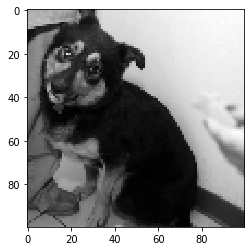

In [14]:
IMG_SIZE = 100
new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap='gray')
plt.show()

In [15]:
training_data = []

def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category) # path to PetImages Dir
        class_num = CATEGORIES.index(category)
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path,img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append([new_array, class_num])
            except Exception as e:
                pass
            
create_training_data()                

In [16]:
print(len(training_data))

24946


In [17]:
import random

random.shuffle(training_data)

In [19]:
for sample in training_data[:10]:
    print(sample[1])

1
1
0
1
0
0
1
1
0
1


In [20]:
x = []
y = []

In [21]:
for features, label in training_data:
    x.append(features)
    y.append(label)

x = np.array(x).reshape(-1, IMG_SIZE, IMG_SIZE, 1)

In [22]:
import pickle 

pickle_out = open("x.pickle","wb")
pickle.dump(x, pickle_out)
pickle_out.close()

pickle_out = open("y.pickle","wb")
pickle.dump(y, pickle_out)
pickle_out.close()

In [23]:
pickle_in = open("x.pickle", "rb")
x = pickle.load(pickle_in)

In [24]:
x[1]

array([[[ 93],
        [ 92],
        [ 90],
        ...,
        [143],
        [145],
        [149]],

       [[101],
        [107],
        [106],
        ...,
        [151],
        [151],
        [151]],

       [[ 97],
        [102],
        [103],
        ...,
        [134],
        [154],
        [148]],

       ...,

       [[148],
        [112],
        [ 69],
        ...,
        [ 70],
        [ 66],
        [ 60]],

       [[141],
        [101],
        [ 59],
        ...,
        [ 60],
        [ 60],
        [ 62]],

       [[126],
        [106],
        [ 54],
        ...,
        [ 74],
        [ 71],
        [ 69]]], dtype=uint8)